# Ultrarelativistic electron beams accelerated by terawatt scalable kHz laser

C. M. Lazzarini$^{1, \ 2}$, G. M. Grittani$^{1}$, P. Valenta$^{1, \ *}$, I. Zymak$^{1}$, R. Antipenkov$^{1}$, U. Chaulagain$^{1}$, L. V. N. Goncalves$^{1}$, A. Grenfell$^{1}$, M. Lamač$^{1, \ 3}$, S. Lorenz$^{1, \ 2}$, M. Nevrkla$^{1, \ 2}$, A. Špaček$^{1, \ 2}$, V. Šobr$^{1}$, W. Szuba$^{1}$, P. Bakule$^{1}$, G. Korn$^{1}$, and S. V. Bulanov$^{1, \ 4}$ 


$^{1}$ ELI Beamlines Facility, The Extreme Light Infrastructure ERIC, Za Radnicí 835, 25241 Dolní Břežany, Czech Republic  
$^{2}$ Faculty of Nuclear Sciences and Physical Engineering, Czech Technical University in Prague, Břehová 7, 11519 Prague, Czech Republic  
$^{3}$ Faculty of Mathematics and Physics, Charles University, Ke Karlovu 3, 12116 Prague, Czech Republic  
$^{4}$ Kansai Photon Science Institute, National Institutes for Quantum Science and Technology, 8-1-7 Umemidai, Kizugawa, Kyoto 619-0215, Japan  

$^{*}$ Electronic mail: petr.valenta@eli-beams.eu
 
(Dated: 28 March 2024)

*Phys. Plasmas* **31**, 030703 (2024); https://doi.org/10.1063/5.0189051

## Abstract

We show the laser-driven acceleration of unprecedented, collimated (2 mrad divergence), and quasi-monoenergetic (25% energy spread) electron beams with energy up to 50 MeV at 1 kHz repetition rate. The laser driver is a multi-cycle (⁠15 fs) 1 kHz optical parametric chirped pulse amplification system, operating at 26 mJ (1.7 TW⁠). The scalability of the driver laser technology and the electron beams reported in this work pave the way toward developing high-brilliance x-ray sources for medical imaging and innovative devices for brain cancer treatment and represent a step toward the realization of a kHz GeV electron beamline.

## Packages

In [1]:
import sdf
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams["mathtext.fontset"] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import scipy
from scipy.constants import pi, elementary_charge as e, epsilon_0 as eps_0, m_e, c
from scipy.signal import savgol_filter
import copy

In [2]:
print("sdf:", sdf.__version__)
print("numpy", np.__version__)
print("matplotlib:", mpl.__version__)
print("scipy:", scipy.__version__)

sdf: 2.6.7
numpy 1.24.3
matplotlib: 3.7.1
scipy: 1.10.1


In [3]:
def cmap_t(name):
    cmap = mpl.colormaps.get_cmap(name).copy()
    q = np.linspace(0, cmap.N + 3, cmap.N + 3)
    cmap._init()
    cmap._lut[:,-1] = q / (0.02 * 259)
    cmap._lut[:,-1][cmap._lut[:,-1] >= 1.0] = 1.0
    cmap.set_bad([0.0, 0.0, 0.0, 0.0])
    return cmap

## Figure 2

In [4]:
spec_select_30bar = np.genfromtxt("./30_bar/exp/spec_select.csv", delimiter=",")
ene_30bar = np.linspace(0, 138, 139)
theta_30bar = np.linspace(0, 120, 121)

spec_select_34bar = np.genfromtxt("./34_bar/exp/spec_select.csv", delimiter=",")
theta_34bar = np.linspace(0, 120, 121)
ene_34bar = np.linspace(0, 153, 154)

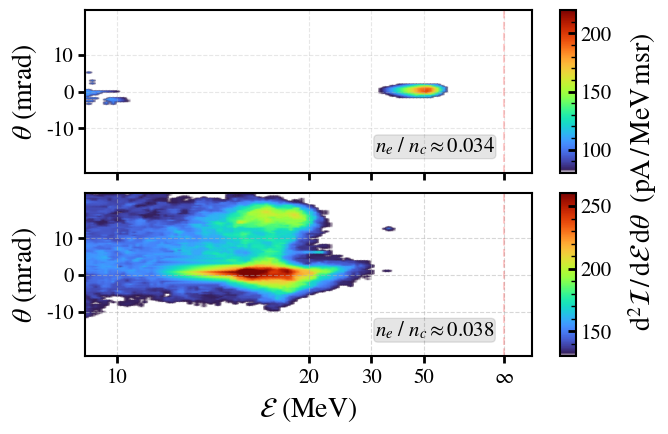

In [5]:
%matplotlib inline

labelsize = 20
ticklabelsize = 15 

fig, ax = plt.subplots(2, 1, figsize=(7.2, 4.5))

im_0 = ax[0].pcolormesh(ene_30bar, theta_30bar, spec_select_30bar, shading="gouraud", rasterized=True, cmap=cmap_t("turbo"), vmin=80, vmax=220)
ax[0].set_ylabel(r"$ \theta \ \left( \mathrm{mrad} \right) $", fontsize=labelsize, labelpad=5)
ax[0].set_xlim(10, 138)
ax[0].set_xticks([18, 41, 56, 74, 129])
ax[0].set_xticklabels([])
ax[0].set_yticks([33, 60, 87])
ax[0].set_yticklabels([10, 0, -10])
ax[0].tick_params(axis="x", which="major", direction="out", length=5, width=2.0, labelsize=ticklabelsize)
ax[0].tick_params(axis="y", which="major", direction="out", length=5, width=2.0, labelsize=ticklabelsize)
ax[0].grid(linestyle="--", alpha=0.3, zorder=0)
ax[0].invert_xaxis()
ax[0].invert_yaxis()
ax[0].axvline(18, color="red", linestyle="--", alpha=0.2)
ax[0].text(55, 105, r"$ n_e \ / \ n_c \approx 0.034 $", fontsize=ticklabelsize, color="black", bbox=dict(facecolor="black", edgecolor="black", alpha=0.1, boxstyle="round, pad=0.05, rounding_size=0.2"))
ax[0].text(-17, 230, r"$ \mathrm{d}^2 \mathcal{I} \, / \, \mathrm{d} \mathcal{E} \, \mathrm{d} \theta \ \ \left( \mathrm{pA \, / \, MeV \, msr} \right) $", rotation=90, fontsize=labelsize)

im_1 = ax[1].pcolormesh(ene_34bar, theta_34bar, spec_select_34bar, shading="gouraud", rasterized=True, cmap=cmap_t("turbo"), vmin=130, vmax=260)
ax[1].set_xlabel(r"$ \mathcal{E} \ \left( \mathrm{MeV} \right) $", fontsize=labelsize, labelpad=5)
ax[1].set_ylabel(r"$ \theta \ \left( \mathrm{mrad} \right) $", fontsize=labelsize, labelpad=5)
ax[1].set_xlim(25, 153)
ax[1].set_xticks([33, 56, 71, 89, 144])
ax[1].set_xticklabels([r"$ \infty $", 50, 30, 20, 10])
ax[1].set_yticks([33, 60, 87])
ax[1].set_yticklabels([10, 0, -10])
ax[1].tick_params(axis="both", which="major", direction="out", length=5, width=2.0, labelsize=ticklabelsize)
ax[1].grid(linestyle="--", alpha=0.5, zorder=0)
ax[1].invert_xaxis()
ax[1].invert_yaxis()
ax[1].axvline(33, color="red", linestyle="--", alpha=0.2)
ax[1].text(70, 105, r"$ n_e \ / \ n_c \approx 0.038 $", fontsize=ticklabelsize, color="black", bbox=dict(facecolor="black", edgecolor="black", alpha=0.1, boxstyle="round, pad=0.05, rounding_size=0.2"))

cbar_1 = plt.colorbar(im_0, ax=ax[0], orientation="vertical", ticks=[100, 150, 200], aspect=10)
cbar_1.ax.minorticks_on()
cbar_1.ax.tick_params(axis="y", which="major", direction="in", length=6.0, width=2, labelsize=ticklabelsize)
cbar_1.ax.tick_params(axis="y", which="minor", direction="in", length=3.5, width=1.0, labelsize=ticklabelsize)
cbar_1.ax.tick_params(axis="x", which="minor", direction="in", length=0.0, width=0.0, labelsize=0.0)

cbar_2 = plt.colorbar(im_1, ax=ax[1], orientation="vertical", ticks=[150, 200, 250, 300], aspect=10)
cbar_2.ax.minorticks_on()
cbar_2.ax.tick_params(axis="y", which="major", direction="in", length=6.0, width=2, labelsize=ticklabelsize)
cbar_2.ax.tick_params(axis="y", which="minor", direction="in", length=3.5, width=1.0, labelsize=ticklabelsize)
cbar_2.ax.tick_params(axis="x", which="minor", direction="in", length=0.0, width=0.0, labelsize=0.0)

fig.subplots_adjust(hspace=0.125)

In [6]:
fig.savefig("./fig_2ab.svg", dpi=300, bbox_inches="tight", facecolor="white", transparent=False)

In [7]:
spec_avg_30bar = np.genfromtxt("./30_bar/exp/spec_avg.csv", delimiter=",")
spec_avg_bins_30bar = np.genfromtxt("./30_bar/exp/spec_avg_bins.csv", delimiter=",")
spec_avg_std_up_30bar = np.genfromtxt("./30_bar/exp/spec_avg_std_up.csv", delimiter=",")
spec_avg_std_low_30bar = np.genfromtxt("./30_bar/exp/spec_avg_std_low.csv", delimiter=",")
spec_avg_std_bins_30bar = np.genfromtxt("./30_bar/exp/spec_avg_std_bins.csv", delimiter=",")

spec_avg_34bar = np.genfromtxt("./34_bar/exp/spec_avg.csv", delimiter=",")
spec_avg_bins_34bar = np.genfromtxt("./34_bar/exp/spec_avg_bins.csv", delimiter=",")
spec_avg_std_up_34bar = np.genfromtxt("./34_bar/exp/spec_avg_std_up.csv", delimiter=",")
spec_avg_std_low_34bar = np.genfromtxt("./34_bar/exp/spec_avg_std_low.csv", delimiter=",")
spec_avg_std_bins_34bar = np.genfromtxt("./34_bar/exp/spec_avg_std_bins.csv", delimiter=",")

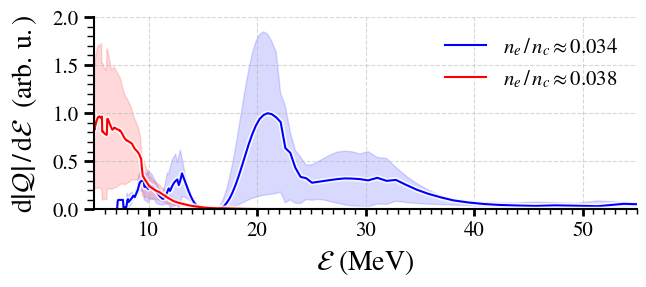

In [8]:
%matplotlib inline

labelsize = 20
ticklabelsize = 15 

fig, ax = plt.subplots(figsize=(7, 2.5), frameon=True)

ax.plot(spec_avg_bins_30bar, spec_avg_30bar, color="blue", path_effects=[pe.Stroke(linewidth=4.0, alpha=0.8, foreground="white"), pe.Normal()], label=r"$ n_e \, / \, n_c \approx 0.034 $")
ax.fill_between(spec_avg_std_bins_30bar, spec_avg_std_low_30bar, spec_avg_std_up_30bar, color="blue", alpha=0.15)
ax.plot(spec_avg_bins_34bar, spec_avg_34bar, color="red", path_effects=[pe.Stroke(linewidth=4.0, alpha=0.8, foreground="white"), pe.Normal()], label=r"$ n_e \, / \, n_c \approx 0.038 $")
ax.fill_between(spec_avg_std_bins_34bar, spec_avg_std_low_34bar, spec_avg_std_up_34bar, color="red", alpha=0.15)
ax.set_xlabel(r"$ \mathcal{E} \ \left( \mathrm{MeV} \right) $", fontsize=labelsize, labelpad=5)
ax.set_ylabel(r"$ \mathrm{d} \left| \mathcal{Q} \right| \, / \, \mathrm{d} \mathcal{E} \ \ \left( \mathrm{arb. \, u.} \right) $", fontsize=labelsize, labelpad=10)
ax.set_xlim(5, 55)
ax.set_ylim(0, 2)

ax.minorticks_on()
ax.tick_params(axis="x", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax.tick_params(axis="x", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax.tick_params(axis="y", which="major", direction="out", length=7.5, width=2.0, labelsize=ticklabelsize)
ax.tick_params(axis="y", which="minor", direction="out", length=5.0, width=1.0, labelsize=ticklabelsize)
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(linestyle="--", alpha=0.5, zorder=1)
ax.legend(frameon=False, fontsize=ticklabelsize)

In [9]:
fig.savefig("./fig_2c.svg", dpi=300, bbox_inches="tight", facecolor="white", transparent=False)

## Figure 3

In [10]:
bins_ene, d_ene = np.linspace(0.0, 70.0, 1001, retstep=True)
ene_ax = (bins_ene[1:] + bins_ene[:-1]) / 2.0
bins_theta = np.linspace(0.0, 1.0, 2001)
theta_ax = (bins_theta[1:] + bins_theta[:-1]) / 2.0
S = 2.0 * pi * (np.cos(bins_theta[:-1]) - np.cos(bins_theta[1:])) # in sr

In [11]:
def spectrum(file):
    
    part_px = file.Particles_Px_subset_sub_high_ene_electron.data / (m_e * c)
    part_py = file.Particles_Py_subset_sub_high_ene_electron.data / (m_e * c)
    part_pz = file.Particles_Pz_subset_sub_high_ene_electron.data / (m_e * c)
    part_w = file.Particles_Weight_subset_sub_high_ene_electron.data
    
    h = np.zeros((np.size(ene_ax), np.size(theta_ax)), dtype=np.float32)
    fwd = np.where(part_px > 0.0)
    ene = (np.sqrt(1.0 + part_px[fwd]**2 + part_py[fwd]**2 + part_pz[fwd]**2) - 1.0) * m_e * c**2 / e * 1.0e-6 # in MeV
    theta = np.arctan(np.sqrt(part_py[fwd]**2 + part_pz[fwd]**2) / part_px[fwd]) # in rad
    w = part_w[fwd] * e * 1.0e12 # in pC
    h = np.histogram2d(ene, theta, bins=[bins_ene, bins_theta], weights=w)[0] / d_ene / S
    
    div_int = np.zeros(np.size(theta_ax), dtype=np.float32)
    div_int = np.sum(np.abs(h) * d_ene, axis=0)
    div_int[theta_ax > 0.95] = 1.0e-2
    
    div_int_high_ene = np.zeros(np.size(theta_ax), dtype=np.float32)
    div_int_high_ene = np.sum(np.abs(h)[ene_ax > 20.0] * d_ene, axis=0)
    div_int_high_ene[theta_ax > 0.95] = 1.0e-2
    
    return h, div_int, div_int_high_ene

In [12]:
file = sdf.read("./30_bar/sim/high_ene_0424.sdf")
h_30bar, div_int_30bar, div_int_high_ene_30bar = spectrum(file)

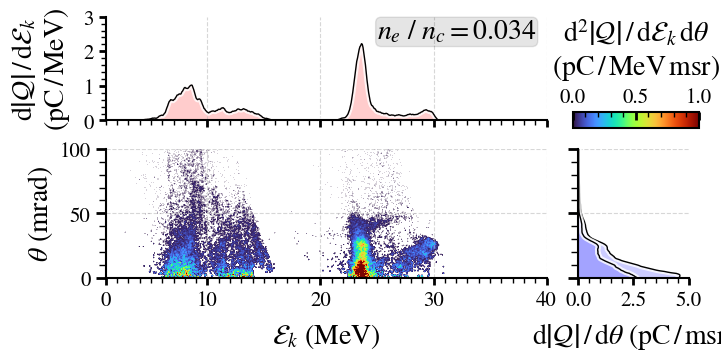

In [13]:
%matplotlib inline

labelsize = 20
ticklabelsize = 15 

fig = plt.figure(figsize=(7, 3.5), constrained_layout=True)
gspec = mpl.gridspec.GridSpec(figure=fig, ncols=2, nrows=2, height_ratios=[1, 1.25], width_ratios=[4, 1], right=0.5)

ax_10 = plt.subplot(gspec[1, 0])
im_0 = ax_10.imshow(h_30bar.T / 1000, aspect="auto", origin="lower", cmap=cmap_t("turbo"), extent=[0, 70, 0, 1000], interpolation="gaussian", norm=mpl.colors.Normalize(0, 1, clip=True), alpha=1.0)
ax_10.set_xlim(1, 40)
ax_10.set_ylim(0, 100)
ax_10.set_xticks([1, 10, 20, 30, 40])
ax_10.set_xticklabels(["0", "10", "20", "30", "40"])
ax_10.set_xlabel(r"$ \mathcal{E}_k \ \left( \mathrm{MeV} \right) $", fontsize=labelsize, labelpad=8)
ax_10.set_ylabel(r"$ \theta \ \left( \mathrm{mrad} \right) $", fontsize=labelsize, labelpad=3)
ax_10.minorticks_on()
ax_10.xaxis.set_minor_locator(mpl.ticker.FixedLocator([k for k in range(0, 40, 1)]))
ax_10.tick_params(axis="x", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax_10.tick_params(axis="x", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax_10.tick_params(axis="y", which="major", direction="out", length=7.5, width=2.0, labelsize=ticklabelsize)
ax_10.tick_params(axis="y", which="minor", direction="out", length=5.0, width=1.0, labelsize=ticklabelsize)
ax_10.spines["top"].set_visible(False)
ax_10.spines["right"].set_visible(False)
ax_10.grid(axis="both", linestyle="--", alpha=0.5, zorder=1)

ax_00 = plt.subplot(gspec[0, 0])
ax_00.plot(ene_ax, savgol_filter(np.sum(h_30bar * S, axis=1), 5, 0, mode="nearest"), color="black", linewidth=1.0, path_effects=[pe.Stroke(linewidth=4.0, alpha=0.8, foreground="white"), pe.Normal()])
ax_00.fill(ene_ax, savgol_filter(np.sum(h_30bar * S, axis=1), 5, 0, mode="nearest"), color="red", alpha=0.2)
ax_00.set_xlim(1, 40)
ax_00.set_ylim(0.0, 3)
ax_00.set_yticks([0, 1, 2, 3])
ax_00.set_xticklabels([])
ax_00.set_ylabel(r"$ \mathrm{d} \left| \mathcal{Q} \right| \, / \, \mathrm{d} \mathcal{E}_k $" "\n" r"$ \left( \mathrm{pC \, / \, MeV} \right) $", fontsize=labelsize, labelpad=8)
ax_00.minorticks_on()
ax_00.xaxis.set_minor_locator(mpl.ticker.FixedLocator([k for k in range(0, 40, 1)]))
ax_00.tick_params(axis="x", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax_00.tick_params(axis="x", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax_00.tick_params(axis="y", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax_00.tick_params(axis="y", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax_00.spines["right"].set_visible(False)
ax_00.spines["top"].set_visible(False)
ax_00.grid(axis="x", linestyle="--", alpha=0.5, zorder=1)
ax_00.text(25, 2.35, r"$ n_e \ / \ n_c = 0.034 $", fontsize=labelsize, color="black", bbox=dict(facecolor="black", edgecolor="black", alpha=0.1, boxstyle="round, pad=0.05, rounding_size=0.2"))

ax_11 = plt.subplot(gspec[1, 1])
ax_11.plot(savgol_filter(div_int_30bar, 11, 0, mode="nearest") / 1000, theta_ax * 1000, color="black", linewidth=1.0, path_effects=[pe.Stroke(linewidth=4.0, alpha=0.8, foreground="white"), pe.Normal()])
ax_11.plot(savgol_filter(div_int_high_ene_30bar, 11, 0, mode="nearest") / 1000, theta_ax * 1000, color="black", linewidth=1.0, path_effects=[pe.Stroke(linewidth=4.0, alpha=0.8, foreground="white"), pe.Normal()])
ax_11.fill_between(savgol_filter(div_int_30bar, 11, 0, mode="nearest") / 1000, theta_ax * 1000, facecolor="blue", edgecolor="black", alpha=0.2)
ax_11.fill_between(savgol_filter(div_int_high_ene_30bar, 11, 0, mode="nearest") / 1000, theta_ax * 1000, facecolor="blue", edgecolor="black", alpha=0.2)
ax_11.set_ylim(0, 100)
ax_11.set_xlim(0, 5)
ax_11.set_xticks([0, 2.5, 5])
ax_11.set_yticklabels([])
ax_11.set_xlabel(r"$ \mathrm{d} \left| \mathcal{Q} \right| \, / \, \mathrm{d} \theta \ \left( \mathrm{pC \, / \, msr} \right) $", fontsize=labelsize, labelpad=8)
ax_11.minorticks_on()
ax_11.tick_params(axis="x", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax_11.tick_params(axis="x", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax_11.tick_params(axis="y", which="major", direction="out", length=7.5, width=2.0, labelsize=ticklabelsize)
ax_11.tick_params(axis="y", which="minor", direction="out", length=5.0, width=1.0, labelsize=ticklabelsize)
ax_11.spines["right"].set_visible(False)
ax_11.spines["top"].set_visible(False)
ax_11.grid(axis="y", linestyle="--", alpha=0.5, zorder=1)

cbax = fig.add_axes([0.81, 0.65, 0.18, 0.045]) 
cbar = plt.colorbar(im_0, cax=cbax, orientation="horizontal")
cbar.locator = mpl.ticker.MaxNLocator(nbins=4)
cbar.set_label(label=r"$ \mathrm{d}^2 \left| \mathcal{Q} \right| \, / \, \mathrm{d} \mathcal{E}_k \, \mathrm{d} \theta $" "\n" r"$ \left( \mathrm{pC \, / \, MeV \, msr} \right) $", fontsize=labelsize, labelpad=-80)
cbar.ax.minorticks_on()
cbar.ax.tick_params(axis="x", which="major", direction="in", length=6.0, width=2, labelsize=ticklabelsize)
cbar.ax.tick_params(axis="x", which="minor", direction="in", length=3.5, width=1.0, labelsize=ticklabelsize)
cbar.ax.tick_params(axis="y", which="minor", direction="in", length=0.0, width=0.0, labelsize=0.0)
cbar.ax.xaxis.set_ticks_position("top")
cbar.set_ticks([0, 0.5, 1])

In [14]:
fig.savefig("./fig_3b.svg", dpi=300, bbox_inches="tight", facecolor="white", transparent=False)

In [15]:
file = sdf.read("./34_bar/sim/high_ene_0424.sdf")
h_34bar, div_int_34bar, div_int_high_ene_34bar = spectrum(file)

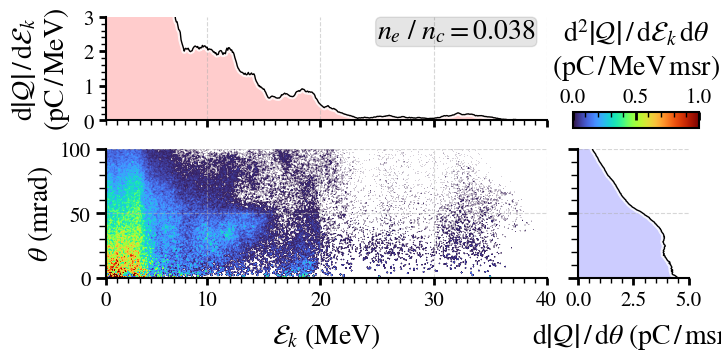

In [16]:
%matplotlib inline

labelsize = 20
ticklabelsize = 15 

fig = plt.figure(figsize=(7, 3.5), constrained_layout=True)
gspec = mpl.gridspec.GridSpec(figure=fig, ncols=2, nrows=2, height_ratios=[1, 1.25], width_ratios=[4, 1])

ax_10 = plt.subplot(gspec[1, 0])
im_0 = ax_10.imshow(h_34bar.T / 1000, aspect="auto", origin="lower", cmap=cmap_t("turbo"), extent=[0, 70, 0, 1000], interpolation="gaussian", norm=mpl.colors.Normalize(0, 1, clip=True), alpha=1.0)
ax_10.set_xlim(1, 40)
ax_10.set_ylim(0, 100)
ax_10.set_xticks([1, 10, 20, 30, 40])
ax_10.set_xticklabels(["0", "10", "20", "30", "40"])
ax_10.set_xlabel(r"$ \mathcal{E}_k \ \left( \mathrm{MeV} \right) $", fontsize=labelsize, labelpad=8)
ax_10.set_ylabel(r"$ \theta \ \left( \mathrm{mrad} \right) $", fontsize=labelsize, labelpad=3)
ax_10.minorticks_on()
ax_10.xaxis.set_minor_locator(mpl.ticker.FixedLocator([k for k in range(0, 40, 1)]))
ax_10.tick_params(axis="x", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax_10.tick_params(axis="x", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax_10.tick_params(axis="y", which="major", direction="out", length=7.5, width=2.0, labelsize=ticklabelsize)
ax_10.tick_params(axis="y", which="minor", direction="out", length=5.0, width=1.0, labelsize=ticklabelsize)
ax_10.spines["top"].set_visible(False)
ax_10.spines["right"].set_visible(False)
ax_10.grid(axis="both", linestyle="--", alpha=0.5, zorder=1)

ax_00 = plt.subplot(gspec[0, 0])
ax_00.plot(ene_ax, savgol_filter(np.sum(h_34bar * S, axis=1), 5, 0, mode="nearest"), color="black", linewidth=1.0, path_effects=[pe.Stroke(linewidth=4.0, alpha=0.8, foreground="white"), pe.Normal()])
ax_00.fill(ene_ax, savgol_filter(np.sum(h_34bar * S, axis=1), 5, 0, mode="nearest"), color="red", alpha=0.2)
ax_00.set_xlim(1, 40)
ax_00.set_ylim(0.0, 3)
ax_00.set_yticks([0, 1, 2, 3])
ax_00.set_xticklabels([])
ax_00.set_ylabel(r"$ \mathrm{d} \left| \mathcal{Q} \right| \, / \, \mathrm{d} \mathcal{E}_k $" "\n" r"$ \left( \mathrm{pC \, / \, MeV} \right) $", fontsize=labelsize, labelpad=8)
ax_00.minorticks_on()
ax_00.xaxis.set_minor_locator(mpl.ticker.FixedLocator([k for k in range(0, 40, 1)]))
ax_00.tick_params(axis="x", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax_00.tick_params(axis="x", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax_00.tick_params(axis="y", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax_00.tick_params(axis="y", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax_00.spines["right"].set_visible(False)
ax_00.spines["top"].set_visible(False)
ax_00.grid(axis="x", linestyle="--", alpha=0.5, zorder=1)
ax_00.text(25, 2.35, r"$ n_e \ / \ n_c = 0.038 $", fontsize=labelsize, color="black", bbox=dict(facecolor="black", edgecolor="black", alpha=0.1, boxstyle="round, pad=0.05, rounding_size=0.2"))

ax_11 = plt.subplot(gspec[1, 1])
ax_11.plot(savgol_filter(div_int_34bar, 11, 0, mode="nearest") / 1000, theta_ax * 1000, color="black", linewidth=1.0, path_effects=[pe.Stroke(linewidth=4.0, alpha=0.8, foreground="white"), pe.Normal()])
ax_11.fill_between(savgol_filter(div_int_34bar, 11, 0, mode="nearest") / 1000, theta_ax * 1000, facecolor="blue", edgecolor="black", alpha=0.2)
ax_11.set_ylim(0, 100)
ax_11.set_xlim(0, 5)
ax_11.set_xticks([0, 2.5, 5])
ax_11.set_yticklabels([])
ax_11.set_xlabel(r"$ \mathrm{d} \left| \mathcal{Q} \right| \, / \, \mathrm{d} \theta \ \left( \mathrm{pC \, / \, msr} \right) $", fontsize=labelsize, labelpad=8)
ax_11.minorticks_on()
ax_11.tick_params(axis="x", which="major", direction="out", length=5.0, width=2.0, labelsize=ticklabelsize)
ax_11.tick_params(axis="x", which="minor", direction="out", length=3.5, width=1.0, labelsize=ticklabelsize)
ax_11.tick_params(axis="y", which="major", direction="out", length=7.5, width=2.0, labelsize=ticklabelsize)
ax_11.tick_params(axis="y", which="minor", direction="out", length=5.0, width=1.0, labelsize=ticklabelsize)
ax_11.spines["right"].set_visible(False)
ax_11.spines["top"].set_visible(False)
ax_11.grid(axis="y", linestyle="--", alpha=0.5, zorder=1)

cbax = fig.add_axes([0.81, 0.65, 0.18, 0.045]) 
cbar = plt.colorbar(im_0, cax=cbax, orientation="horizontal")
cbar.locator = mpl.ticker.MaxNLocator(nbins=4)
cbar.set_label(label=r"$ \mathrm{d}^2 \left| \mathcal{Q} \right| \, / \, \mathrm{d} \mathcal{E}_k \, \mathrm{d} \theta $" "\n" r"$ \left( \mathrm{pC \, / \, MeV \, msr} \right) $", fontsize=labelsize, labelpad=-80)
cbar.ax.minorticks_on()
cbar.ax.tick_params(axis="x", which="major", direction="in", length=6.0, width=2, labelsize=ticklabelsize)
cbar.ax.tick_params(axis="x", which="minor", direction="in", length=3.5, width=1.0, labelsize=ticklabelsize)
cbar.ax.tick_params(axis="y", which="minor", direction="in", length=0.0, width=0.0, labelsize=0.0)
cbar.ax.xaxis.set_ticks_position("top")
cbar.set_ticks([0, 0.5, 1])

In [17]:
fig.savefig("./fig_3c.svg", dpi=300, bbox_inches="tight", facecolor="white", transparent=False)